<a href="https://colab.research.google.com/github/HwangHanJae/BigDataPratice/blob/main/clustering_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#군집분석

##비계층적 군집분석

* ### K-Means - 중심기반

* ### DBSCAN - 밀도기반

###K-Means 군집분석 절차
1. 초기점(k) 설정
* k는 중심점(centroid)이자, 묶일 그룹(cluster)의 수와 같다.
2. 그룹(cluster)부여
* k개의 중심점(동그라미)과 개별 데이터(네모)간의 거리를 측정한다.
* 가장 가까운 중심점으로 데이터를 부여한다.
3. 중심점(centroid)업데이트
* 할당된 데이터들의 평균값(mean)으로 새로운 중심점(centroid)을 업데이트 한다.
4. 최적화
* 2,3번의 작업을 반복적으로 수행한다.
* 변화가 없으면 작업을 중단한다.

In [29]:
#iris 데이터를 활용
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris.data)
df.columns=['Sepal length','Sepal width','Petal length','Petal width']

#그래프로 확인하기 위하여 2개의 컬럼만 사용

df = df[['Sepal length','Sepal width']].copy()

df.head()


,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


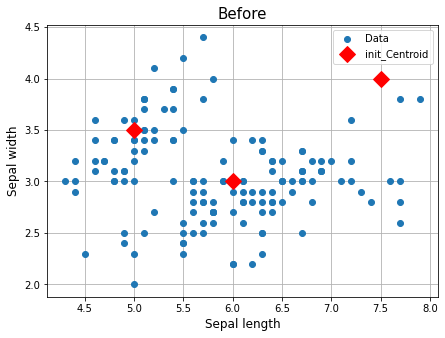

In [30]:
#초기값 3개를 직접 지정하였고, 그래프로 확인
x1,y1 = 5, 3.5
x2,y2 = 6, 3
x3,y3 = 7.5, 4
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
plt.plot(df["Sepal length"], df["Sepal width"], "o", label="Data")
plt.plot([x1,x2,x3], [y1,y2,y3], "rD", markersize=12, label='init_Centroid')
plt.xlabel("Sepal length", fontsize=12)
plt.ylabel("Sepal width", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [31]:
#K-Means로 군집화 이후에 그래프로 확인
import numpy as np
from sklearn.cluster import KMeans


init = np.array([(x1,y1),(x2,y2),(x3,y3)])
k_means = KMeans(n_clusters = 3, init=init, random_state=42)

k_means.fit(df)

df['cluster'] = k_means.labels_

final_centers = k_means.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1149: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


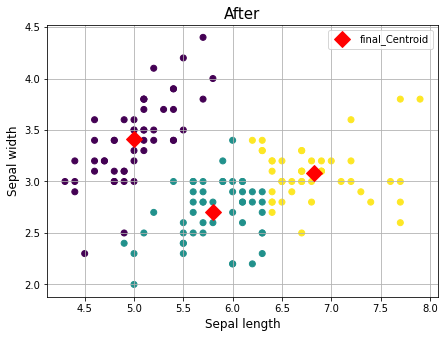

In [39]:
plt.figure(figsize=(7,5))
plt.title("After", fontsize=15)
plt.scatter(df['Sepal length'],df['Sepal width'],c=df["cluster"])
plt.plot(final_centers[:,0], final_centers[:,1], "rD", markersize=12, label='final_Centroid')
plt.xlabel("Sepal length", fontsize=12)
plt.ylabel("Sepal width", fontsize=12)
plt.legend()
plt.grid()
plt.show()

###DBSCAN
- 유사한 데이터는 서로 근접하게 분포할 것이다.

* K-means와 달리 처음에 그룹의 수(k)를 설정하지 않고 자동적으로 최적의 그룹 수를 찾아나간다.



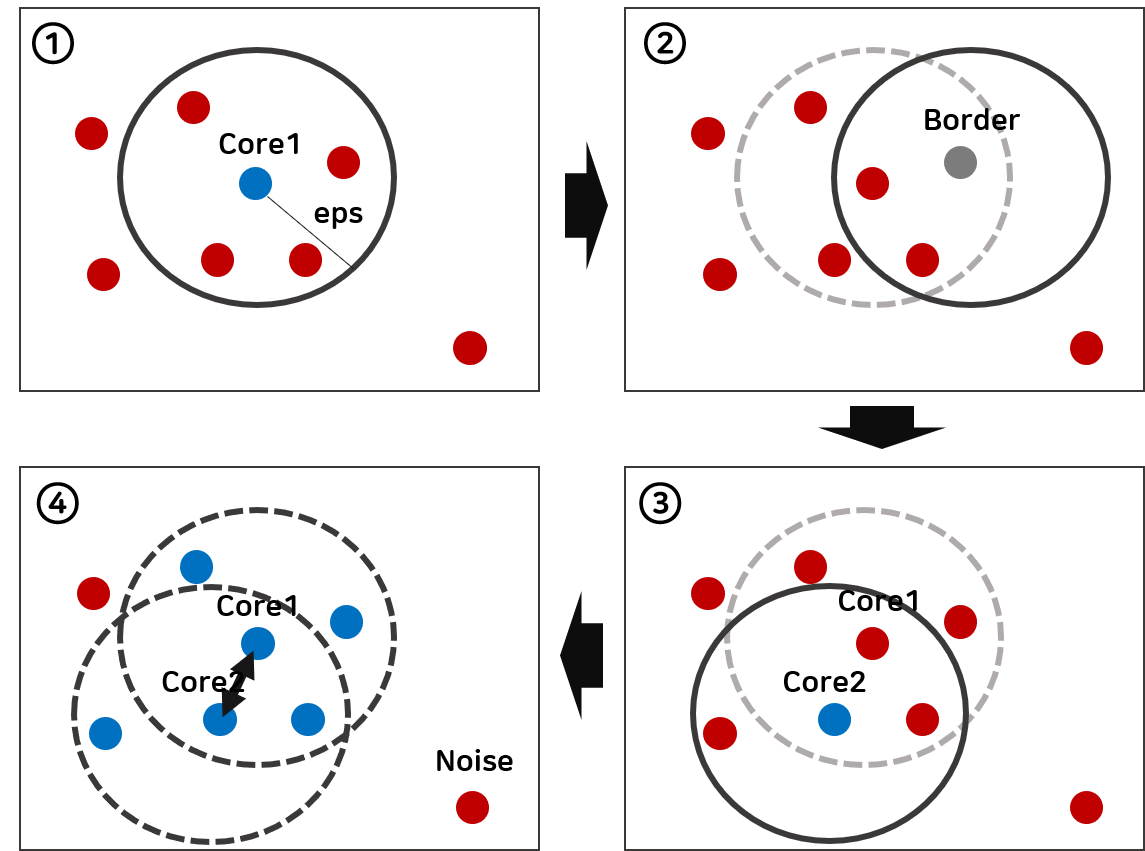

1. 먼저 하나의 점(파란색)을 중심으로 반경(eps) 내에 최소 점이 4개(minPts=4)이상 있으면, 하나의 군집으로 판단하며 해당 점(파란색)은 Core가 된다.

2. 반경 내에 점이 3개 뿐이므로 Core가 되진 않지만 Core1의 군집에 포함된 점으로, 이는 Border가 된다.

3. 1번과 마찬가지로 Core가 된다.

4. 그런데 반경내의 점중에 Core1이 포함되어 있어 군집을 연결하여 하나의 군집으로 묶인다

용어정리

* minPts : 반경 내 최소 개체(point)수

* eps(epsilon) : 군집화할 반경

* Core : 중심점(minPts를 만족할 경우)

* Border : 경계점(minPts를 만족하진 않지만, 어느 Core 반경에 속한 경우)

* Noise : 어느 군집에도 속하지 않는 점

In [72]:
#예제 데이터로 Moon 데이터셋을 활용
#Moon 데이터는 make_moons 함수로 생성할 수 있으며
#샘플 수(n_samples)와 분산정도(noise)를 조절해서 생성할 수 있다.

from sklearn.datasets import make_moons

x,y = make_moons(n_samples=300, noise=0.05,random_state=42)
df = pd.DataFrame(x)

df.head()

,0,1
0,0.622519,-0.372101
1,1.904269,-0.136303
2,-0.069431,0.456117
3,0.933899,0.237483
4,1.180360,-0.490847


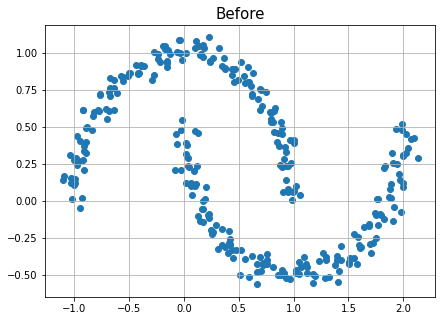

In [73]:
#그래프로 확인해보기

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
plt.scatter(df[0], df[1])
plt.grid()
plt.show()

eps : 반경 설정(속성값의 단위)

min_samples : 최소 개체 수

In [74]:
#DBSCAN 클러스터링

from sklearn.cluster import DBSCAN
eps = 0.3

min_samples = 5
dbscan = DBSCAN(eps = eps, min_samples=min_samples)

dbscan.fit(df)

DBSCAN(eps=0.3)

In [75]:
df['cluster'] = dbscan.labels_

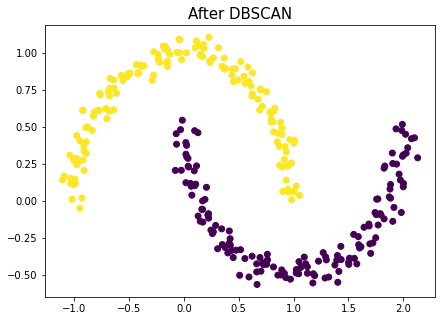

In [76]:
plt.figure(figsize=(7,5))
plt.title("After DBSCAN", fontsize=15)
plt.scatter(df[0],df[1], c=df["cluster"])
plt.grid
plt.show()

###KMeans VS DBSCAN 비교

In [77]:
df = df.drop("cluster", axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


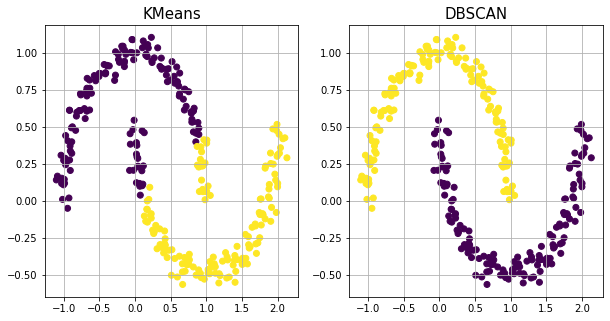

In [93]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 2, random_state=42)
df_kmeans = df.copy()
k_means.fit(df_kmeans)
df_kmeans["cluster"] = k_means.labels_



from sklearn.cluster import DBSCAN
eps = 0.3

min_samples = 5
dbscan = DBSCAN(eps = eps, min_samples=min_samples)

dbscan.fit(df)
df["cluster"] = dbscan.labels_

#DBSCAN
f, ax = plt.subplots(1,2, figsize=(10,5))
plt.title("DBSCAN", fontsize=15)
plt.scatter(df[0],df[1], c=df["cluster"])
plt.axes(ax[0])
plt.grid()

#KMeans
plt.title("KMeans", fontsize=15)
plt.scatter(df_kmeans[0], df_kmeans[1],c = df_kmeans["cluster"])
plt.axes(ax[1])
plt.grid()
plt.show()